# AIC ir BIC – modelių palyginimas

**Bibliotekos:** `statsmodels`, `seaborn`, `scikit-learn`, `matplotlib`


## Kas yra AIC ir BIC?

**AIC (Akaike Information Criterion)** ir **BIC (Bayesian Information Criterion)** – tai kriterijai, skirti **modelių palyginimui**:

AIC=2k−2ln(L)

kur:

𝑘
k – modelio parametrų skaičius,

𝐿
L – modelio maksimali tikimybė (likelihood).

BIC=kln(n)−2ln(L)

kur:

𝑛
n – stebėjimų skaičius,

𝑘
k – modelio parametrų skaičius,

𝐿
L – modelio maksimali tikimybė.

- **Mažesnė AIC/BIC reikšmė** → geresnis kompromisas tarp tikslumo ir paprastumo (tik lyginant tuos pačius duomenis).
- **BIC** griežčiau baudžia sudėtingumą (ypač kai \( n \) didelis), todėl dažniau renkasi paprastesnį modelį.
- Absoliučių „gerų“ ribų **nėra** – ieškome **minimumo** tarp nagrinėtų modelių.

- AIC/BIC formulės remiasi log-likelihood.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud

In [8]:
def fit_linear_sm(X: pd.DataFrame, y: pd.Series):
    """Sukuria OLS modelį ir grąžina AIC/BIC bei santrauką."""
    X_ = sm.add_constant(X, has_constant="add")
    model = sm.OLS(y, X_, missing="drop").fit()
    return {
        "aic": model.aic,
        "bic": model.bic,
        "k": len(model.params),     # parametrų skaičius
        "summary": model.summary()
    }

### Features (nepriklausomi kintamieji – X)
1. **Chins** – prisitraukimų skaičius, kuriuos asmuo atliko per testą.
2. **Situps** – atsilenkimų (pilvo preso pratimų) skaičius.
3. **Jumps** – šuolių aukštyn skaičius (per nustatytą laiką).

### Targets (priklausomi kintamieji – Y)
1. **Weight** – asmens svoris (kilogramais).
2. **Waist** – liemens apimtis (centimetrais).
3. **Pulse** – širdies pulsas po fizinio krūvio (dūžių per minutę).

In [7]:
# 2) Duomenys: Linnerud (regresija)
lin = load_linnerud()
X = pd.DataFrame(lin.data, columns=lin.feature_names) # Chins, Situps, Jumps
Y = pd.DataFrame(lin.target, columns=lin.target_names)  # Weight, Waist, Pulse

y = Y["Weight"]
X.head(21), y.head(21)


(    Chins  Situps  Jumps
 0     5.0   162.0   60.0
 1     2.0   110.0   60.0
 2    12.0   101.0  101.0
 3    12.0   105.0   37.0
 4    13.0   155.0   58.0
 5     4.0   101.0   42.0
 6     8.0   101.0   38.0
 7     6.0   125.0   40.0
 8    15.0   200.0   40.0
 9    17.0   251.0  250.0
 10   17.0   120.0   38.0
 11   13.0   210.0  115.0
 12   14.0   215.0  105.0
 13    1.0    50.0   50.0
 14    6.0    70.0   31.0
 15   12.0   210.0  120.0
 16    4.0    60.0   25.0
 17   11.0   230.0   80.0
 18   15.0   225.0   73.0
 19    2.0   110.0   43.0,
 0     191.0
 1     189.0
 2     193.0
 3     162.0
 4     189.0
 5     182.0
 6     211.0
 7     167.0
 8     176.0
 9     154.0
 10    169.0
 11    166.0
 12    154.0
 13    247.0
 14    193.0
 15    202.0
 16    176.0
 17    157.0
 18    156.0
 19    138.0
 Name: Weight, dtype: float64)

In [4]:
# 3) Modelių rinkiniai (didėjančio sudėtingumo)
feature_sets = [
    ["Chins"],
    ["Chins", "Situps"],
    ["Chins", "Situps", "Jumps"],
]

rows = []
summaries = {}

for i, feats in enumerate(feature_sets, start=1):
    res = fit_linear_sm(X[feats], y)
    rows.append({
        "Model": f"M{i}",
        "Features": ", ".join(feats),
        "k": res["k"],
        "AIC": res["aic"],
        "BIC": res["bic"]
    })
    summaries[f"M{i}"] = res["summary"]

scores = pd.DataFrame(rows)
scores


,Model,Features,k,AIC,BIC
0,M1,Chins,2,184.694208,186.685673
1,M2,"Chins, Situps",3,184.305386,187.292582
2,M3,"Chins, Situps, Jumps",4,185.751142,189.734071


In [ ]:
AIC - M2 - maziuasias (dedam 1 arba 2 kintamuosius, reikalingi pasitikslinti kurie kintamieji yra tikslesni)
BIC -M1 - maziausias (dedam 1 arba 2 kintamuosius, reikalingi pasitikslinti kurie kintamieji yra tikslesni)

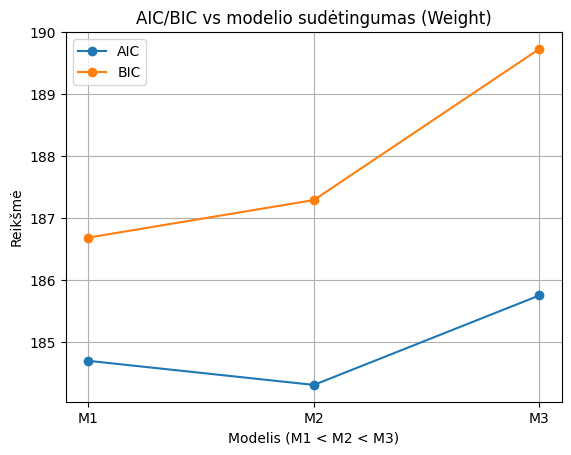

In [9]:
# 4) AIC/BIC grafikas
plt.figure()
plt.plot(scores["Model"], scores["AIC"], marker="o", label="AIC")
plt.plot(scores["Model"], scores["BIC"], marker="o", label="BIC")
plt.title("AIC/BIC vs modelio sudėtingumas (Weight)")
plt.xlabel("Modelis (M1 < M2 < M3)")
plt.ylabel("Reikšmė")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# 5) Santraukos
for m in ["M1","M2","M3"]:
    print("="*80, m)
    print(summaries[m])

================================================================================ M1
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.223
Date:                Thu, 14 Aug 2025   Prob (F-statistic):             0.0894
Time:                        17:39:58   Log-Likelihood:                -90.347
No. Observations:                  20   AIC:                             184.7
Df Residuals:                      18   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------